# Step 1 — Knowing The Dataset
## Before starting, we need to make all the necessary imports.

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

## define what are the transformations we want to perform on our data 

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

## download the data sets

In [41]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=65, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# Step 2 — Knowing The Dataset Better

## check out the shape of the images and the labels

In [42]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([65, 1, 28, 28])
torch.Size([65])


## Let’s display one image from the training set, for example, the first one.

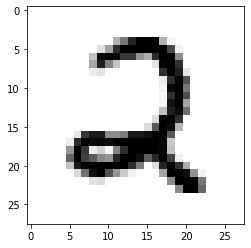

In [43]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray_r')

### Let’s display some more images, this will give us a feel of how the dataset looks like.

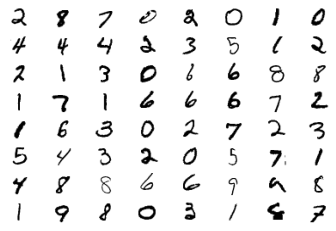

In [45]:
figure = plt.figure()
num_of_images = 64
for index in range(1, num_of_images + 1):
    plt.subplot(8, 8, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Step 3 — Build The Neural Network

In [8]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

# Step 4 — Adjusting Weights

In [10]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0050, -0.0050, -0.0050,  ..., -0.0050, -0.0050, -0.0050],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        ...,
        [-0.0042, -0.0042, -0.0042,  ..., -0.0042, -0.0042, -0.0042],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023]])


# Step 5 — Core Training Process

## We make use of torch.optim which is a module provided by PyTorch to optimize the model, perform gradient descent and update the weights by back-propagation.  

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6619295046400668
Epoch 1 - Training loss: 0.293541476527638
Epoch 2 - Training loss: 0.23045657284017693
Epoch 3 - Training loss: 0.18578613166218755
Epoch 4 - Training loss: 0.15464681392110613
Epoch 5 - Training loss: 0.1340179462919135
Epoch 6 - Training loss: 0.11733109898555444
Epoch 7 - Training loss: 0.10358518193454058
Epoch 8 - Training loss: 0.09295755920153279
Epoch 9 - Training loss: 0.08262398860045969
Epoch 10 - Training loss: 0.07533443294989783
Epoch 11 - Training loss: 0.06822644297265883
Epoch 12 - Training loss: 0.06367682461003299
Epoch 13 - Training loss: 0.05904473929178478
Epoch 14 - Training loss: 0.05341932281448659

Training Time (in minutes) = 1.9092790087064107


## From above processing, it can be seen in each epoch (number of times we iterate over the training set), we will be seeing a gradual decrease in training loss.


# Step 6 — Testing & Evaluation

## The model is ready, but it has to evaluate it first. A utility function view_classify() was created to show the image and class probabilities that were predicted.  

### an image to the trained model from the validation set that we created earlier, to see how the model works.

In [15]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout() 
 

Predicted Digit = 6


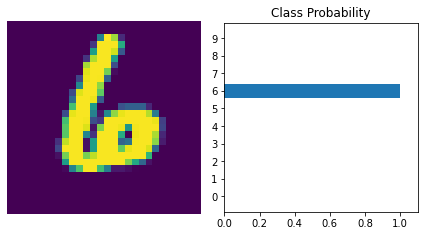

In [48]:
images, labels = next(iter(valloader))

img = images[1].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

## Now we iterate through the validation set using a for loop and calculate the total number of correct predictions. This is how we can calculate the accuracy.

In [49]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9729
